# Library

In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from module_KK import * 
from preprocessing_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *

JAVA is in the system path?:  False
JAVA is in the system path?:  Adding...
Operation Machine:  Intel64 Family 6 Model 186 Stepping 2, GenuineIntel
Operation Platform:  64bit
OS Type:  Windows
OS Version:  10
Python Version:  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


2024-07-03 22:06:38,592	INFO worker.py:1612 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Descriptive Statistics

In [2]:
# 데이터로딩 및 전처리
df = pd.read_csv(os.path.join('.', 'Data', 'df_KTX_KK.csv')).iloc[:,1:]

In [3]:
df_stat = df.groupby(['주운행선', '전체주중주말'])['승차인원수'].describe()[['mean', 'std', 'max']].astype(int)
df_stat.columns = ['월별 승차인원수 평균', '월별 승차인원수 표준편차', '월별 승차인원수 최대값']
display(df_stat)

월별 승차인원수 평균  월별 승차인원수 표준편차  월별 승차인원수 최대값
주운행선 전체주중주말                                          
경부선  전체          2387398        1210415       3894486
     주말          1207555         631933       2144330
     주중          1179843         596738       1968430
경전선  전체           412924         210629        716861
     주말           209397         111073        412828
     주중           203527         102553        379607
동해선  전체           109223         218167        612267
     주말            52069         104835        324842
     주중            57154         114084        345258
전라선  전체           417882         234184        840753
     주말           214397         122773        461647
     주중           203485         114576        413158
호남선  전체           675680         331543       1088042
     주말           339963         173952        583089
     주중           335716         163390        588227

경부선
Numerical Scaling... ( 2024-07-03 22:06:56.844905 )


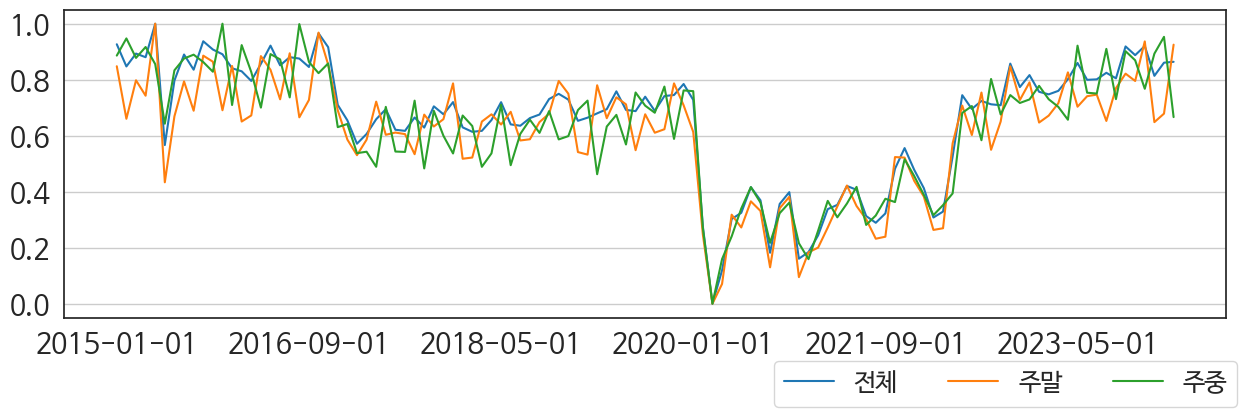

경전선
Numerical Scaling... ( 2024-07-03 22:06:56.983525 )


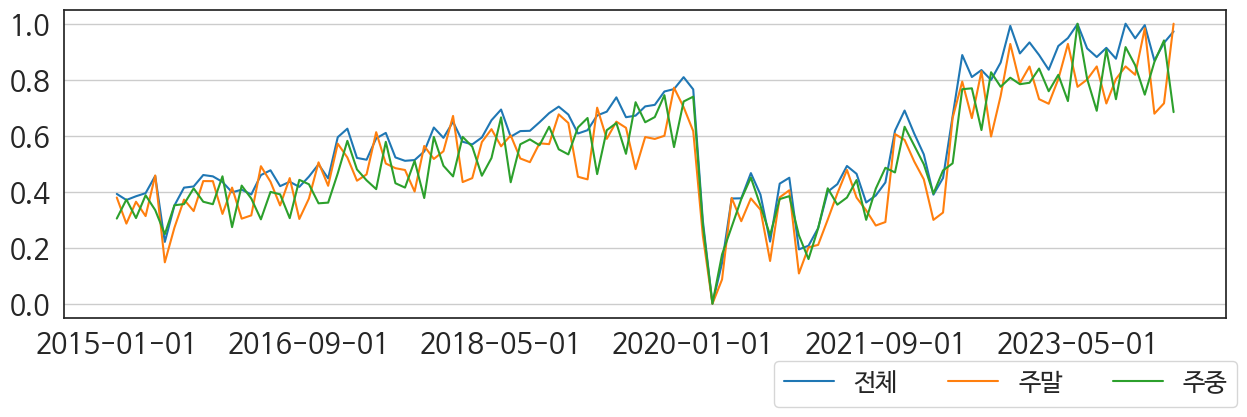

동해선
Numerical Scaling... ( 2024-07-03 22:06:57.089581 )


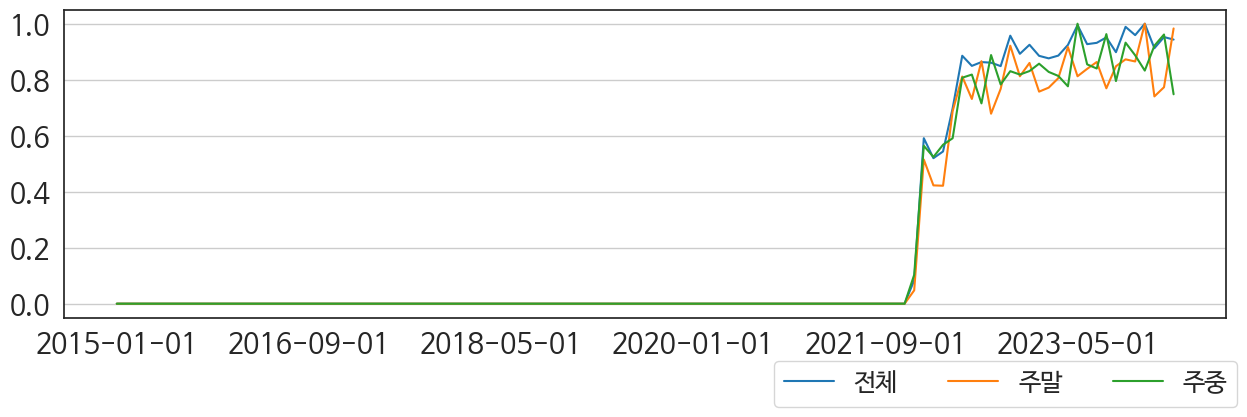

전라선
Numerical Scaling... ( 2024-07-03 22:06:57.191488 )


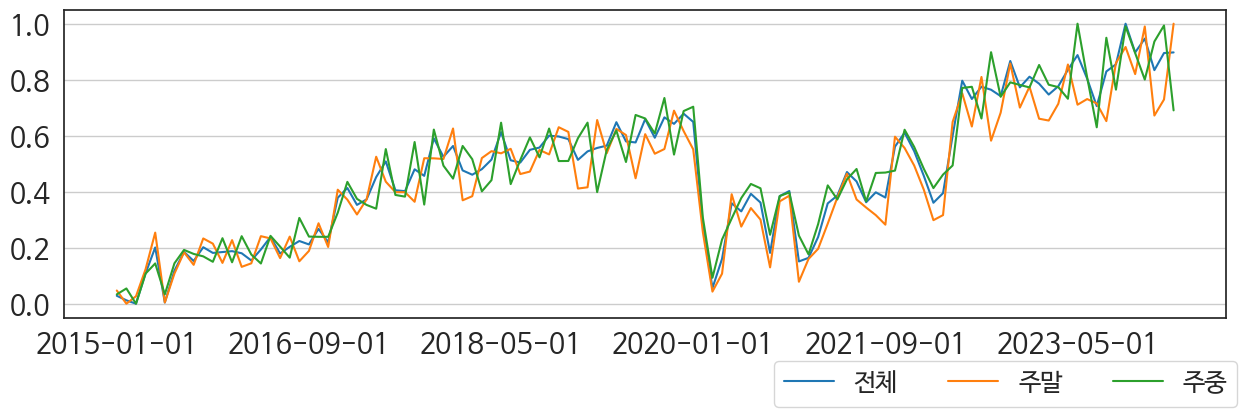

호남선
Numerical Scaling... ( 2024-07-03 22:06:57.303536 )


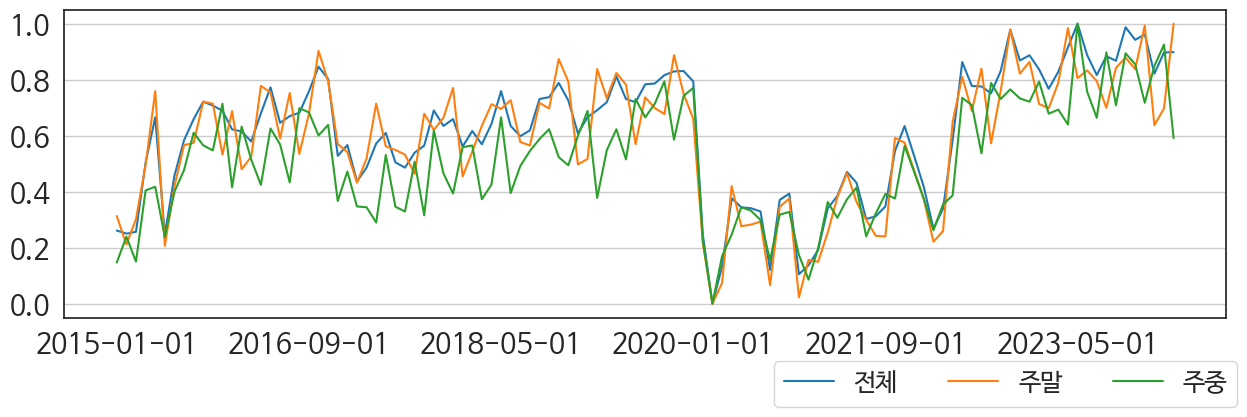

In [4]:
df_time = df.groupby(['전체주중주말', '주운행선', '운행년월'])['승차인원수'].sum().unstack(level=0).reset_index()

for period in df_time['주운행선'].unique():
    print(period)
    df_sub = df_time[df_time['주운행선'] == period]
    df_sub.set_index('운행년월', inplace=True)
    df_sub = df_sub.loc[df_sub.index <= '2024-03-01'].iloc[:,1:]
    plot_timeseries_dforigin(df_sub, scaled=True, figsize=(15,4), 
                             xlabel='', legend_colnum=5, save_local=False)

전체
Numerical Scaling... ( 2024-07-03 22:06:57.770732 )


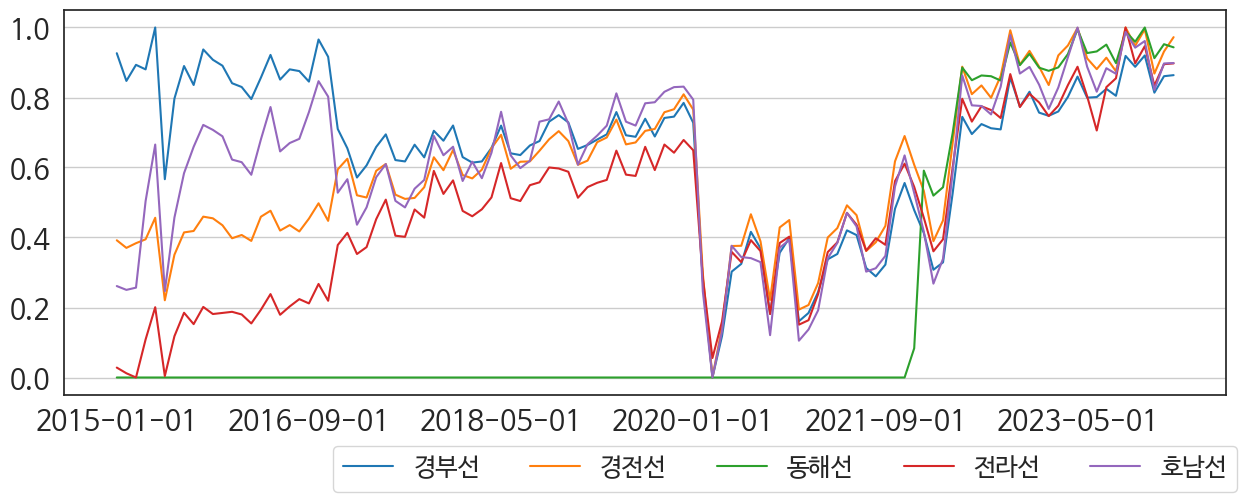

주말
Numerical Scaling... ( 2024-07-03 22:06:57.933329 )


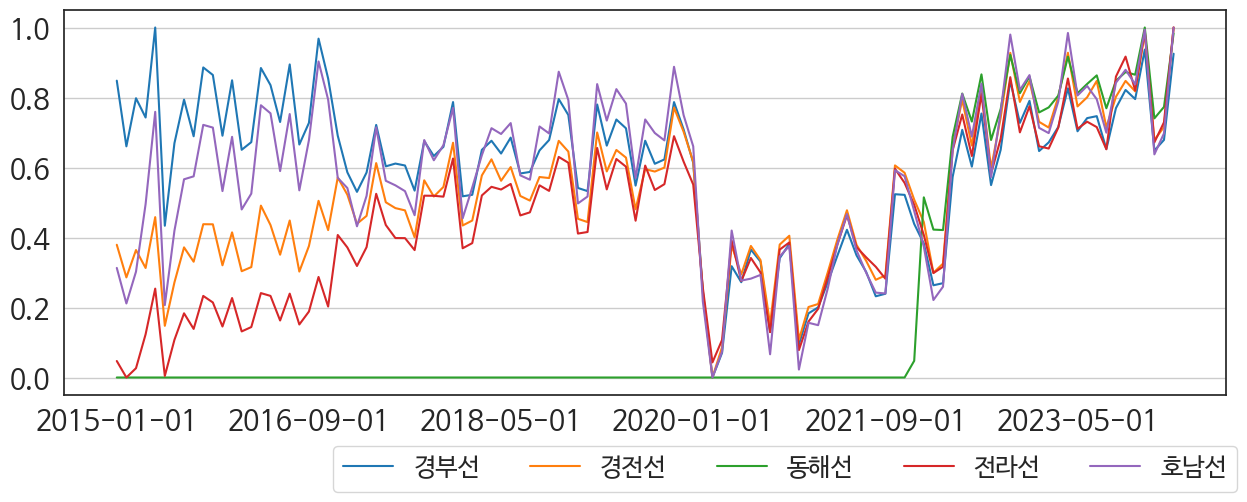

주중
Numerical Scaling... ( 2024-07-03 22:06:58.114410 )


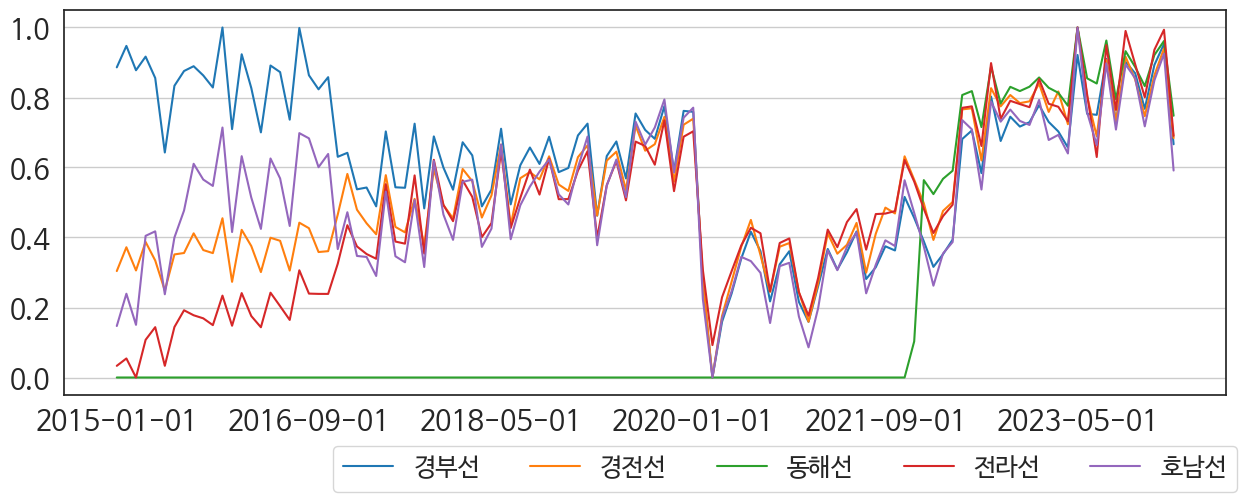

In [5]:
df_time = df.groupby(['전체주중주말', '주운행선', '운행년월'])['승차인원수'].sum().unstack(level=1).reset_index()

for period in df_time['전체주중주말'].unique():
    print(period)
    df_sub = df_time[df_time['전체주중주말'] == period]
    df_sub.set_index('운행년월', inplace=True)
    df_sub = df_sub.loc[df_sub.index <= '2024-03-01'].iloc[:,1:]
    plot_timeseries_dforigin(df_sub, scaled=True, figsize=(15,5), xlabel='', legend_colnum=5, save_local=False)

# Result Summary

In [8]:
# 데이터로딩 및 전처리
df = pd.read_csv(os.path.join('.', 'Data', 'df_KTX_KK.csv')).iloc[:,1:]
folder_location = os.path.join(os.getcwd(), 'Result', '20240703')
n_top_algo = 3
criteria = 'Top_Average' # 'Top_Average'

direction_all, direction_top = pd.DataFrame(), pd.DataFrame() 
for line in df['주운행선'].unique():
    files = [os.path.join(folder_location, file) for file in os.listdir(folder_location) if file.split('.')[0].split('_')[-1] == line]
    for period in df['전체주중주말'].unique():
        direction = []
        for file in files:
            eval_file = pd.read_excel(file, sheet_name='Performance_'+period, index_col=0)[['MSPE', 'MAPE', 'MedAPE']].iloc[:n_top_algo,:]
            direction.append([line, period, file.split('.')[0].split('_')[-2], eval_file.index[0],
                              eval_file.iloc[0,:][0], eval_file.iloc[0,:][1], eval_file.iloc[0,:][2], eval_file.mean(axis=0)['MAPE']])
        direction = pd.DataFrame(direction)
        direction.columns = ['주운행선', '전체주말주중', '전처리방향', '알고리즘', 'MSPE', 'MAPE', 'MedAPE', 'Top_Average']
        direction_all = pd.concat([direction, direction_all], axis=0)
        direction_good = direction.loc[:,criteria].argmin()
        direction_top = pd.concat([direction_top, direction.iloc[[direction_good],:]], axis=0)
        
direction_all.sort_values(by=['주운행선', '전체주말주중'])

주운행선 전체주말주중          전처리방향        알고리즘   MSPE   MAPE  MedAPE  Top_Average
0  경부선     전체        1DLag12      NBEATS 0.0022 0.0398  0.0396       0.0515
1  경부선     전체  2DFUTR13Lag12      NBEATS 0.0022 0.0398  0.0396       0.0556
2  경부선     전체       2DFUTR13      NBEATS 0.0022 0.0398  0.0396       0.0556
3  경부선     전체   2DFUTR5Lag12      NBEATS 0.0022 0.0398  0.0396       0.0630
4  경부선     전체        2DFUTR5      NBEATS 0.0022 0.0398  0.0396       0.0630
0  경부선     주말        1DLag12      NBEATS 0.0069 0.0693  0.0599       0.0717
1  경부선     주말  2DFUTR13Lag12        LSTM 0.0065 0.0618  0.0480       0.0680
2  경부선     주말       2DFUTR13        LSTM 0.0065 0.0618  0.0480       0.0680
3  경부선     주말   2DFUTR5Lag12  DilatedRNN 0.0062 0.0590  0.0284       0.0567
4  경부선     주말        2DFUTR5  DilatedRNN 0.0062 0.0590  0.0284       0.0567
0  경부선     주중        1DLag12        LSTM 0.0118 0.0911  0.1096       0.0946
1  경부선     주중  2DFUTR13Lag12         GRU 0.0096 0.0859  0.0809       0.0981
2  경부선     주중       2DFUTR13         GRU 0.0096 0.0859  0.0809       0.0981
3  경부선     주중   2DFUTR5Lag12     NBEATSx 0.0155 0.1068  0.1013       0.1081
4  경부선     주중        2DFUTR5     NBEATSx 0.0155 0.1068  0.1013       0.1081
0  경전선     전체        1DLag12       NHITS 0.0020 0.0377  0.0317       0.0490
1  경전선     전체  2DFUTR13Lag12     NBEATSx 0.0015 0.0335  0.0358       0.0405
2  경전선     전체       2DFUTR13     NBEATSx 0.0015 0.0335  0.0358       0.0405
3  경전선     전체   2DFUTR5Lag12       NHITS 0.0015 0.0335  0.0358       0.0405
4  경전선     전체        2DFUTR5       NHITS 0.0015 0.0335  0.0358       0.0405
0  경전선     주말        1DLag12       NHITS 0.0069 0.0656  0.0705       0.0788
1  경전선     주말  2DFUTR13Lag12       NHITS 0.0085 0.0728  0.0673       0.0818
2  경전선     주말       2DFUTR13      NBEATS 0.0109 0.0823  0.0606       0.0939
3  경전선     주말   2DFUTR5Lag12        LSTM 0.0067 0.0618  0.0409       0.0689
4  경전선     주말        2DFUTR5        LSTM 0.0067 0.0618  0.0409       0.0689
0  경전선     주중        1DLag12      NBEATS 0.0123 0.0866  0.0744       0.0874
1  경전선     주중  2DFUTR13Lag12      NBEATS 0.0123 0.0866  0.0744       0.1015
2  경전선     주중       2DFUTR13      NBEATS 0.0123 0.0866  0.0744       0.1015
3  경전선     주중   2DFUTR5Lag12  DilatedRNN 0.0071 0.0687  0.0640       0.0775
4  경전선     주중        2DFUTR5  DilatedRNN 0.0071 0.0687  0.0640       0.0787
0  동해선     전체        1DLag12       NHITS 0.0026 0.0428  0.0370       0.0531
1  동해선     전체  2DFUTR13Lag12     NBEATSx 0.0038 0.0501  0.0481       0.0910
2  동해선     전체       2DFUTR13     NBEATSx 0.0038 0.0501  0.0481       0.0910
3  동해선     전체   2DFUTR5Lag12      NBEATS 0.0045 0.0583  0.0518       0.0979
4  동해선     전체        2DFUTR5      NBEATS 0.0045 0.0583  0.0518       0.0979
0  동해선     주말        1DLag12       NHITS 0.0115 0.0952  0.0901       0.0998
1  동해선     주말  2DFUTR13Lag12     NBEATSx 0.0189 0.0989  0.0658       0.1358
2  동해선     주말       2DFUTR13     NBEATSx 0.0189 0.0989  0.0658       0.1358
3  동해선     주말   2DFUTR5Lag12  DilatedRNN 0.0209 0.1093  0.0837       0.1140
4  동해선     주말        2DFUTR5  DilatedRNN 0.0209 0.1093  0.0837       0.1140
0  동해선     주중        1DLag12      NBEATS 0.0113 0.0861  0.0772       0.0921
1  동해선     주중  2DFUTR13Lag12      NBEATS 0.0113 0.0861  0.0772       0.1344
2  동해선     주중       2DFUTR13      NBEATS 0.0113 0.0861  0.0772       0.1320
3  동해선     주중   2DFUTR5Lag12      NBEATS 0.0113 0.0861  0.0772       0.1823
4  동해선     주중        2DFUTR5      NBEATS 0.0113 0.0861  0.0772       0.1823
0  전라선     전체        1DLag12      NBEATS 0.0025 0.0373  0.0307       0.0490
1  전라선     전체  2DFUTR13Lag12      NBEATS 0.0025 0.0373  0.0307       0.0694
2  전라선     전체       2DFUTR13      NBEATS 0.0025 0.0373  0.0307       0.0741
3  전라선     전체   2DFUTR5Lag12      NBEATS 0.0025 0.0373  0.0307       0.0694
4  전라선     전체        2DFUTR5      NBEATS 0.0025 0.0373  0.0307       0.0693
0  전라선     주말        1DLag12      NBEATS 0.0091 0.0835  0.0879       0.0868
1  전라선     주말  2DFUTR13Lag12      NBEATS 0.0091 0.